# DAT 19: Homework 2 Assignment

## Instructions

For Homework 2, we will build on the work we did with the Titanic dataset in Homework 1. In this assignment, we will build a logistic regression model to predict passenger survival.

Please do all your analysis to answer the questions below in this Jupyter notebook. Show your work.

**Please submit your completed notebook by 6:00PM on Monday, January 11.**

## About the Data

```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

## Homework Assignment

**1) Create a logistic regression model on the Titanic dataset to predict the survival of passengers. Show your model output. Include coefficient values.**

In [1]:
import csv as csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


loc="C://Users//user//Desktop//dat_sf_19//DAT_SF_19//homework" 
data_raw = pd.read_csv(loc+'//titanic.csv')
data_raw.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
data_raw.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [60]:
# deal with categorical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV



# adjust the cabin to the first letter in the string
enc_lab={}
data_raw['Cabin_adj']=data_raw['Cabin'].str[0]
# Categorical features
col_adj=['Sex', 'Embarked', 'Cabin_adj']

data=data_raw.copy(deep=True)
train=data.drop(col_adj, 1)
# apply label encoder
for i in data_raw[col_adj]:
    enc_lab[i]=LabelEncoder()
    data[i]=enc_lab[i].fit_transform(data_raw[i])
# apply onehot to features
enc_onehot={}
X_pretrain=data[col_adj]
enc_onehot=OneHotEncoder()
X_pretrain=enc_onehot.fit_transform(X_pretrain)

# Convert onehot back to Dataframe
cols = [col_adj[i] + '_' + str(j) for i in range(0,len(col_adj)) for j in range(0,enc_onehot.n_values_[i]) ]

train_cat=pd.DataFrame(X_pretrain.toarray(), columns=cols)
train[cols]=train_cat[cols]


In [62]:
# remove all nan's

train=train.fillna(0)

y_train=train.values[:,1]
y_train=map(int, np.array(y_train).tolist())
X_train=train.drop(['Name', 'Cabin', 'Ticket'], axis=1).values[:, 2:]

data.drop(['Name', 'Cabin', 'Ticket'], axis=1).columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Sex', u'Age', u'SibSp',
       u'Parch', u'Fare', u'Embarked', u'Cabin_adj'],
      dtype='object')

Model Parameters  <bound method LogisticRegression.get_params of LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)>
Logit Coefficient values  [('Pclass', -0.70062291223766626), ('Age', -0.016411701629776117), ('SibSp', -0.27255780423330533), ('Parch', -0.05967781468350266), ('Fare', 0.0033578601198552905), ('Sex_0', 1.937761168042341), ('Sex_1', -0.74730733073465705), ('Embarked_0', 0.18443458272844196), ('Embarked_1', 0.58677976794123676), ('Embarked_2', 0.22073371550462395), ('Embarked_3', 0.19850577113342344), ('Cabin_adj_0', -0.36951774802294401), ('Cabin_adj_1', 0.070756073091438082), ('Cabin_adj_2', 0.17272842282345904), ('Cabin_adj_3', -0.29766589573172442), ('Cabin_adj_4', 0.56499172075627002), ('Cabin_adj_5', 0.93952027254177217), ('Cabin_adj_6', 0.78962358525850251), ('Cabin_adj_7', -0.41550670

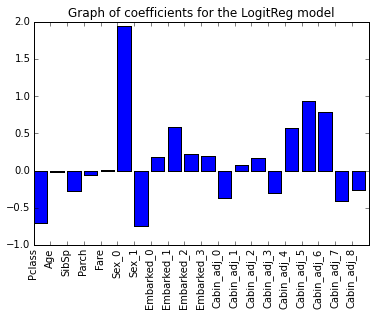

In [65]:
%matplotlib inline
# data.hist(figsize=(8,8))
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1)
clf.fit(X_train, y_train)
data_plot=train.drop(['Name', 'Cabin', 'Ticket'], axis=1).columns[2:]
print "Model Parameters ", clf.get_params
print 'Logit Coefficient values ', zip(data_plot, clf.coef_.ravel())
data_plot_col=np.array(data_plot.values).tolist()

plt.bar(np.arange(len(data_plot_col)), clf.coef_.ravel())
plt.xticks(np.arange(len(data_plot_col)), data_plot_col, rotation='vertical')
plt.title('Graph of coefficients for the LogitReg model')

**2) Which features are predictive for this logistic regression? Explain your thinking. Do not simply cite model statistics.**

Sex, cabin, and passenger class seem like the most predictive based on the coefficient values. This makes sense because as the idea of saving females first was a very normal idea back then. Passenger and cabin also seems very likely as a predictor as the class would indicate their location on the boat as well as access to exits in order to reach the lifeboats.

**3) Implement cross-validation for your logistic regression model. Select the number of folds. Explain your choice.**

In [68]:
from sklearn.cross_validation import cross_val_score
# len(y_train)
cv_sizes=[5, 10, 25, 50,100]
for i in cv_sizes:
    print 'CV size', i, 'mean score', cross_val_score(clf, X_train, y_train, cv=i).mean()





CV size 5 mean score 0.78790174577
CV size 10 mean score 0.787909998865
CV size 25 mean score 0.79141923436
CV size 50 mean score 0.786764705882
CV size 100 mean score 0.788694444444


I choose 25 folds since it has the highest mean cross val score

**4) In the hw-assignments director on the class github repo, there is a file called titanic-test.csv. What does your logistic regression model predict for these previously unseen (i.e. out of sample) passengers?**

In [78]:
test_raw=pd.read_csv(loc+'//titanic-test.csv')
# adjust the cabin to the first letter in the string
test_raw['Cabin_adj']=test_raw.Cabin.str[0]

pre_test=test_raw.copy(deep=True)
# apply label encoder
for i in test_raw[col_adj]:
    pre_test[i]=enc_lab[i].transform(test_raw[i])


# apply onehot encoder
X_pretest=enc_onehot.transform(pre_test[col_adj])

# bring back into dataframe
X_pretest=pd.DataFrame(X_pretest.toarray(), columns=cols)

test=test_raw.drop(col_adj, 1).copy(deep=True)
test[cols]=X_pretest[cols]



# remove all nan's
test=test.fillna(0)
# print test.head()
X_test=test.drop(['Cabin', 'Name', 'Ticket'], axis=1).values[:,1:]

pred=clf.predict(X_test)

print (map(int, np.array(pred).tolist()))





[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002286F588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000023CFBCC0>]], dtype=object)

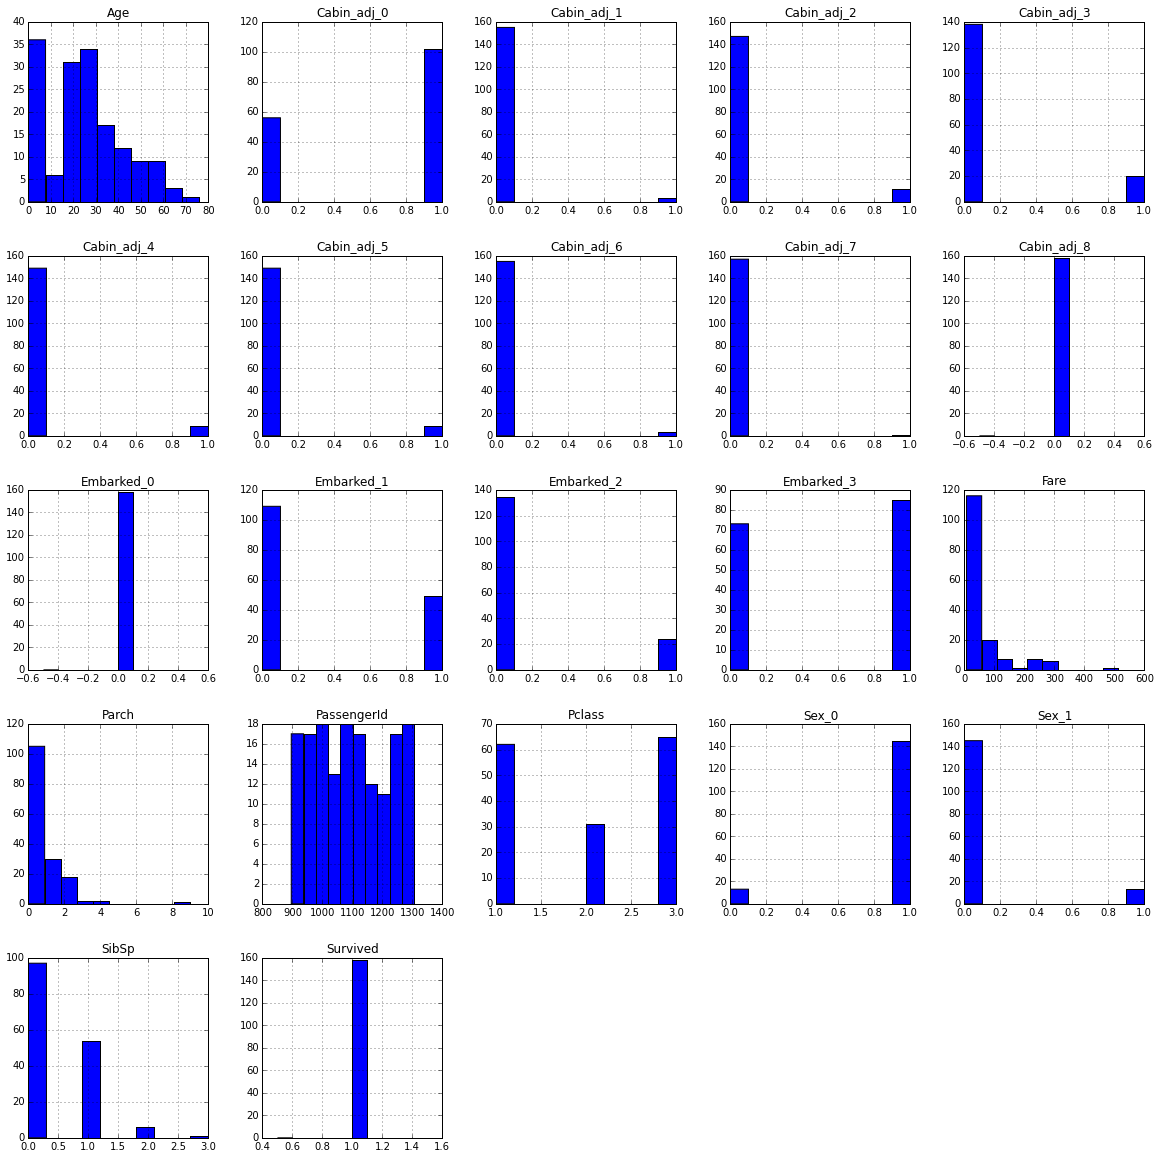

In [80]:
from pandas.tools.plotting import scatter_matrix
test['Survived']=pred
test_scat=test[test['Survived']==1]
test_scat.hist(figsize=(20,20))


The histogram above shows the spread of each of the features for passengers that have survived after conducting the prediction using the logistic model. You can see that an overwhelming majority of females and passengers in their 20s or 30s survived.